In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
from analsis.analsis_utils.plot_utils import plot_two_metrics, plot_two_metrics_vs_colored_metric, \
    plot_binned_metric_vs_mean_metric, plot_two_metrics_by_ephoc, plot_two_metrics_with_mean, \
    plot_two_metrics_with_mean_multi_ep, plot_two_metrics_by_ephoc, plot_two_ann_metrics_train_test, \
    plot_two_ann_metrics_begining_end, plot_mean_r2_bars, plot_hist_of_performances_by_ephoc,plot_ann_metric_train_test
import joblib

COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS_16 = ["#adb5bd", '#4F6272', "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897', '#9a8c98',
             '#f6bd60', "#ede7b1", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596', "#8c2f39"]


In [3]:
task = "digits"
num_layers = '3'
dims = [64, 8,8, 10]
_, dim1,dim2, _ = dims

results_path = f"/Volumes/noamaz/modularity/{task}/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
folder_name = f"{task}_{num_layers}_layers_{dim1}_{dim2}"
plot_path = f"{local_base_path}/plots/{task}_multi_arch/{folder_name}"

In [4]:
folder_name

'digits_3_layers_8_8'

In [5]:
res_folder = f"{results_path}/{folder_name}/first_analysis_results"
epochs = []
all_first_analsis = []
for file_name in sorted(os.listdir(res_folder)):
    ep = int(file_name.split('_')[-2])
    epochs.append(ep)
    first_analsis = pd.read_csv(f"{res_folder}/{file_name}")
    all_first_analsis.append(first_analsis.rename(
        columns={'connectivity_ratio': 'density',
                 }).sort_values('mean_performance', ascending=False)
                             )


In [6]:
all_first_analsis = [x for _, x in sorted(zip(epochs, all_first_analsis))]
epochs = sorted(epochs)

In [34]:
first_analsis = pd.read_csv(f"{res_folder}/2023-09-07-09-24-39_all_results_from_teach_archs_results_with_motifs_6000_ep.csv")

first_analsis.drop_duplicates([
            'num_connections',
            'entropy',
            'normed_entropy',
            'connectivity_ratio',
            'num_neurons',
                'neurons_in_layer_0',
                'neurons_in_layer_1',
                'neurons_in_layer_2',
                'max_possible_connections',
                'motifs_count_0',
                'motifs_count_1',
                'motifs_count_2',]).to_csv(f"{results_path}/{folder_name}/2023-09-07-09-24-39_all_results_from_teach_archs_results_with_motifs_6000_ep_no_duplicates.csv", index=False)

In [35]:
f"{results_path}/{folder_name}/2023-09-07-09-24-39_all_results_from_teach_archs_results_with_motifs_6000_ep_no_duplicates.csv",

('/Volumes/noamaz/modularity/digits//digits_2_layers_16/2023-09-07-09-24-39_all_results_from_teach_archs_results_with_motifs_6000_ep_no_duplicates.csv',)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/noamazmon/PycharmProjects/network_modularity/plots/digits_multi_arch/digits_3_layers_8_8/2023-09-08-12-16-35_digits_multi_archs_mean_performance_vs_density.png'

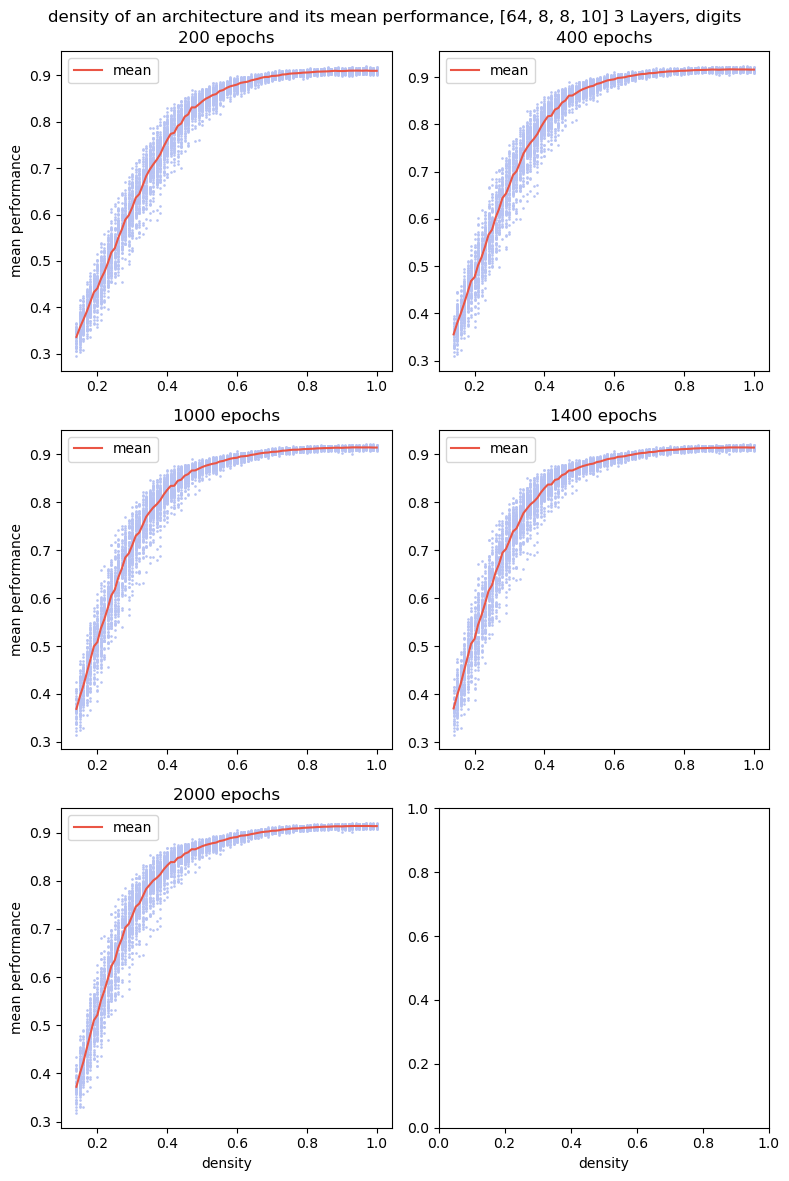

In [8]:
x_metric_name, y_metric_name = ('density', 'mean_performance')
plot_two_metrics_with_mean_multi_ep(
    x_metric_name=x_metric_name,
    y_metric_name=y_metric_name,
    all_result_df=all_first_analsis,
    epochs=epochs,
    task=task,
    time_str=time_str,
    plot_path=plot_path,
    name_addition=f'_multi_archs',
    title_addition=f'{num_layers} Layers, ',
    mark_size=0.8,
    color_ind=1,
    dims=dims
)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/noamazmon/PycharmProjects/network_modularity/plots/digits_multi_arch/digits_3_layers_8_8/2023-09-08-12-16-35_mean_performance_by_ephoc.png'

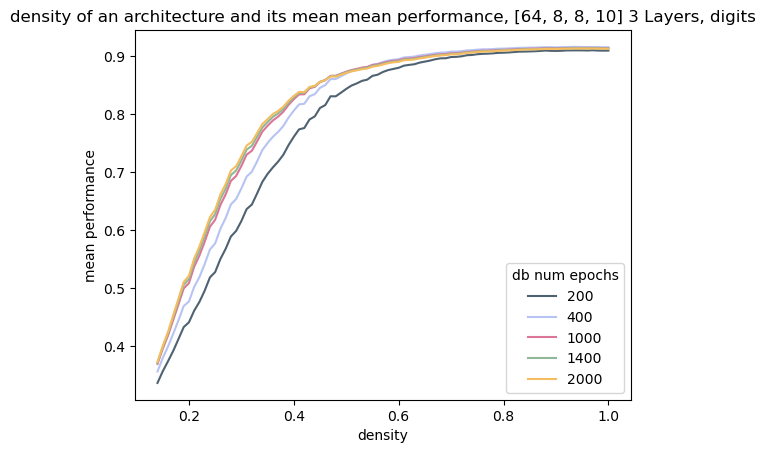

In [9]:
plot_two_metrics_by_ephoc(
    x_metric_name=x_metric_name,
    y_metric_name=y_metric_name,
    all_result_df=all_first_analsis,
    epochs=epochs,
    task=task,
    time_str=time_str,
    plot_path=plot_path,
    title_addition=f'{num_layers} Layers, ',
    dims=dims,
)

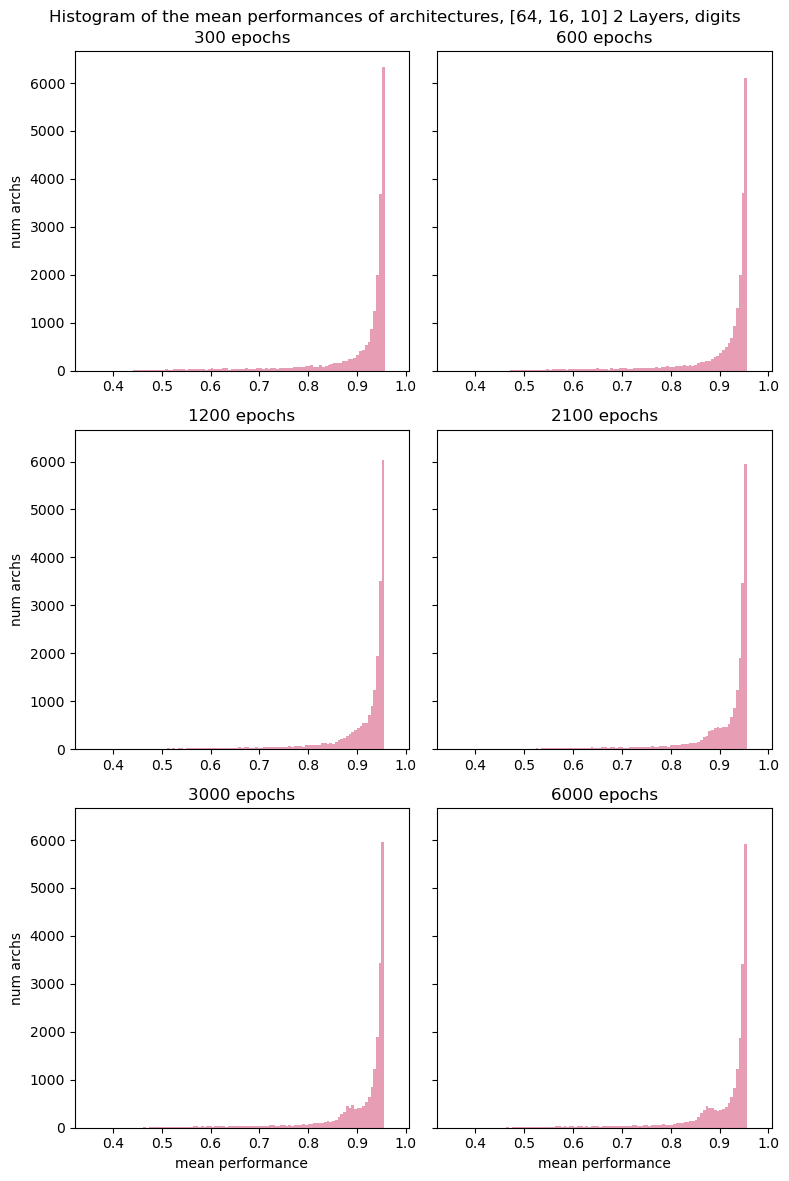

In [25]:
plot_hist_of_performances_by_ephoc(
    metric_name='mean_performance',
    all_result_df=all_first_analsis,
    epochs=epochs,
    task=task,
    time_str=time_str,
    plot_path=plot_path,
    title_addition=f'{num_layers} Layers, ',
    dims=dims,
    bins=100,
)

4

In [37]:
ann_reg_res_folder = f"/Volumes/noamaz/modularity/digits/digits_{num_layers}_layers_{dim1}/teach_archs_regression_results"
epochs = [10000]
all_ann_reg_res = []
# files_names = [f for f in sorted(os.listdir(ann_reg_res_folder) if '.csv' in f]
files_names = [
'digits_2023-09-07-13-49-50_lr_0.001_bs_512_output_10k_ep_adj_False_meta_True_2k_ephoc.csv',
    'digits_2023-09-07-13-49-50_lr_0.005_bs_512_output_10k_ep_adj_False_meta_True_2k_ephoc.csv',
]
lr = ['0.001', '0.005']
for file_name in files_names:
    ann_reg_res = pd.read_csv(f"{ann_reg_res_folder}/{file_name}").rename(columns={"losses": "losses train", })
    all_ann_reg_res.append(ann_reg_res)

In [38]:
#all_ann_reg_res = [x for _, x in sorted(zip(epochs, all_ann_reg_res))]
#epochs = sorted(epochs)

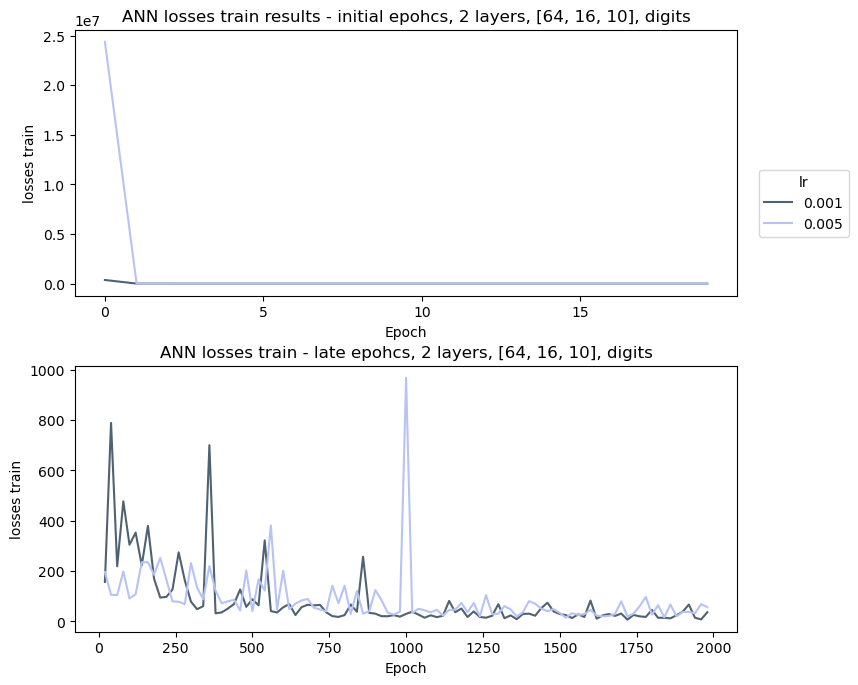

In [39]:
plot_two_ann_metrics_begining_end(
    x_metric_name='Epoch',
    y_metric_name='losses train',
    all_result_list=all_ann_reg_res,
    epochs=lr,
    dims=dims,
    time_str=time_str,
    task=task,
    plot_path=plot_path,
    title_addition=f'{num_layers} layers',
    time_split_ind=20,
    jump=20,
    legend_title='lr'
)

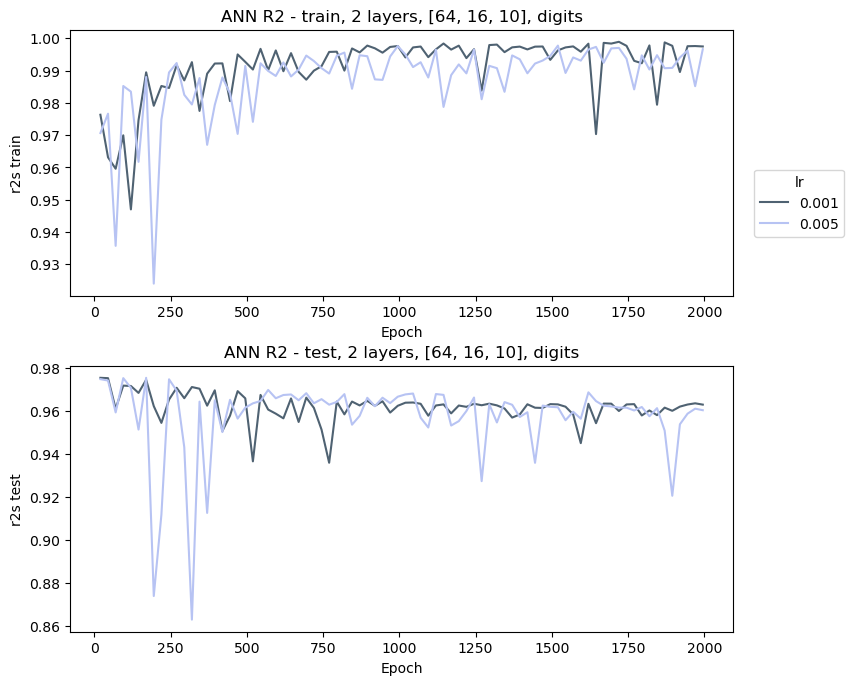

In [40]:

plot_ann_metric_train_test(
x_metric_name = 'Epoch',
y_metric_name = 'r2s',
all_result_list = all_ann_reg_res,
epochs = lr,
dims = dims,
time_str = time_str,
task = task,
plot_path = plot_path,
title_addition = f'{num_layers} layers',
start_ind = 20,
jump = 25,
legend_title = 'lr',
)

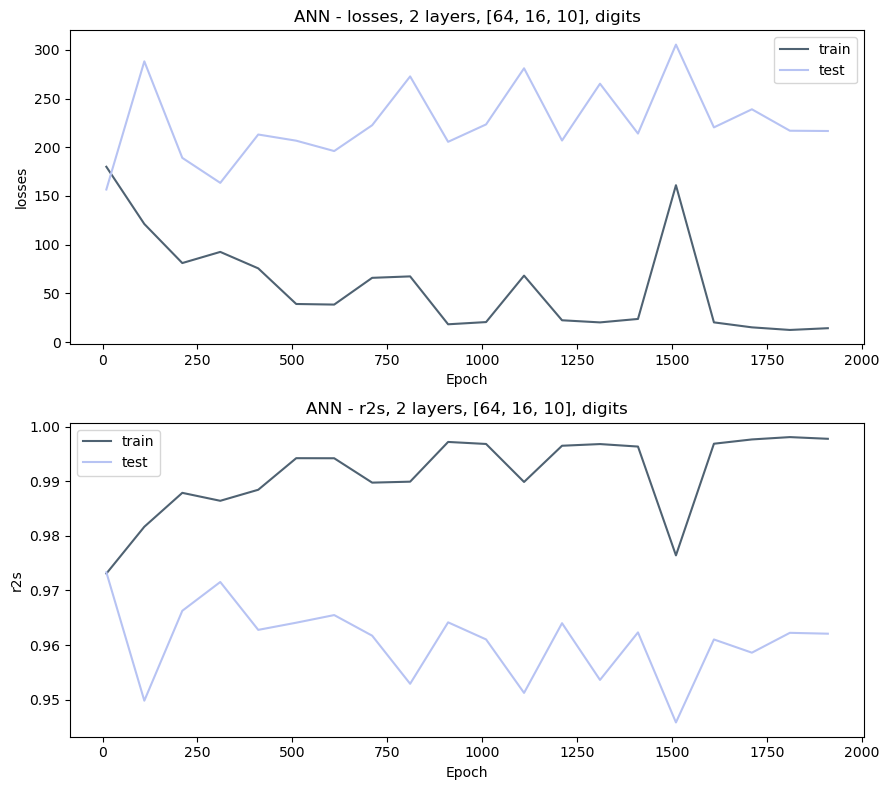

In [41]:
plot_two_ann_metrics_train_test(
    x_metric_name='Epoch',
    y_up_metric_name='losses',
    y_down_metric_name='r2s',
    result=all_ann_reg_res[0].rename(columns={"losses": "losses train", }),
    dims=dims,
    time_str=time_str,
    task=task,
    plot_path=plot_path,
    title_addition=f'{num_layers} layers',
    start_ind=10,
    jump=100,
)